In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('LR_DF.csv')

In [3]:
df.head(10)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9.0
1,C10,1,41,M,84370.59,PROF,14,41-45,843,9.0
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26.0
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19.0
4,C10000,0,43,M,97100.48,NaN,3,41-45,397,8.0
5,C10001,0,30,M,160378.60,SAL,2,26-30,781,11.0
6,C10002,0,43,M,26275.55,PROF,23,41-45,354,12.0
7,C10003,0,53,M,33616.47,SAL,45,>50,239,5.0
8,C10004,0,45,M,1881.37,PROF,3,41-45,339,13.0
9,C10005,0,37,M,3274.37,PROF,33,36-40,535,9.0


In [4]:
df.shape

(20000, 10)

In [5]:
df.dtypes

Cust_ID            object
Target              int64
Age                 int64
Gender             object
Balance           float64
Occupation         object
No_OF_CR_TXNS       int64
AGE_BKT            object
SCR                 int64
Holding_Period    float64
dtype: object

In [6]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Cust_ID,20000,20000,C1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target,20000.0,NaN,NaN,NaN,0.0444,0.205987,0.0,0.0,0.0,0.0,1.0
Age,20000.0,NaN,NaN,NaN,38.3962,9.600179,21.0,30.0,38.0,47.0,55.0
Gender,20000,3,M,14279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,20000.0,NaN,NaN,NaN,146181.305626,169812.527447,0.0,23736.915,79755.745,217310.6325,1246966.77
Occupation,15360,4,SAL,5908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_OF_CR_TXNS,20000.0,NaN,NaN,NaN,16.61795,12.96995,0.0,7.0,13.0,21.0,50.0
AGE_BKT,20000,7,31-35,3488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCR,20000.0,NaN,NaN,NaN,557.13605,260.521453,100.0,333.0,560.0,784.0,999.0
Holding_Period,19000.0,NaN,NaN,NaN,15.199737,9.23918,0.0,7.0,15.0,23.0,31.0


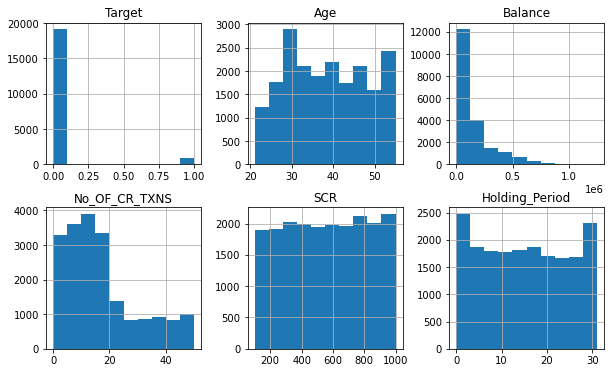

In [7]:
df.hist(layout = (2, 3), figsize = (10, 6))
plt.show()

In [8]:
df.isnull().sum()

Cust_ID              0
Target               0
Age                  0
Gender               0
Balance              0
Occupation        4640
No_OF_CR_TXNS        0
AGE_BKT              0
SCR                  0
Holding_Period    1000
dtype: int64

In [9]:
print(df.Occupation.value_counts())

SAL         5908
PROF        5480
SELF-EMP    3272
SENP         700
Name: Occupation, dtype: int64


In [10]:
df.Occupation = df.Occupation.replace(np.nan, 'UNEMP', regex=True)
#df.head()

In [11]:
df.Occupation.value_counts()

SAL         5908
PROF        5480
UNEMP       4640
SELF-EMP    3272
SENP         700
Name: Occupation, dtype: int64

In [12]:
df.isnull().sum()

Cust_ID              0
Target               0
Age                  0
Gender               0
Balance              0
Occupation           0
No_OF_CR_TXNS        0
AGE_BKT              0
SCR                  0
Holding_Period    1000
dtype: int64

In [13]:
df.Holding_Period = df.Holding_Period.replace(np.nan,np.mean(df.Holding_Period), regex=True)
#df.head()

In [14]:
df.isnull().sum()

Cust_ID           0
Target            0
Age               0
Gender            0
Balance           0
Occupation        0
No_OF_CR_TXNS     0
AGE_BKT           0
SCR               0
Holding_Period    0
dtype: int64

In [15]:
df.dtypes

Cust_ID            object
Target              int64
Age                 int64
Gender             object
Balance           float64
Occupation         object
No_OF_CR_TXNS       int64
AGE_BKT            object
SCR                 int64
Holding_Period    float64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

df_obj = df.select_dtypes(exclude=['int64', 'float64'])
df_num = df.select_dtypes(include=['int64', 'float64'])
df_encoded = df_obj.apply(LabelEncoder().fit_transform)
df = df_num.join(df_encoded)

In [17]:
df.head(10)

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Cust_ID,Gender,Occupation,AGE_BKT
0,0,30,160378.60,2,826,9.0,0,1,1,0
1,1,41,84370.59,14,843,9.0,1,1,0,3
2,0,49,60849.26,49,328,26.0,2,0,0,4
3,0,49,10558.81,23,619,19.0,3,1,1,4
4,0,43,97100.48,3,397,8.0,4,1,4,3
5,0,30,160378.60,2,781,11.0,5,1,1,0
6,0,43,26275.55,23,354,12.0,6,1,0,3
7,0,53,33616.47,45,239,5.0,7,1,1,6
8,0,45,1881.37,3,339,13.0,8,1,0,3
9,0,37,3274.37,33,535,9.0,9,1,0,2


In [18]:
df.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Cust_ID,Gender,Occupation,AGE_BKT
0,0,30,160378.60,2,826,9.0,0,1,1,0
1,1,41,84370.59,14,843,9.0,1,1,0,3
2,0,49,60849.26,49,328,26.0,2,0,0,4
3,0,49,10558.81,23,619,19.0,3,1,1,4
4,0,43,97100.48,3,397,8.0,4,1,4,3


In [ ]:
#df_encoded.head(3)

In [19]:
df.shape

(20000, 10)

In [20]:
df.Target.value_counts()

0    19112
1      888
Name: Target, dtype: int64

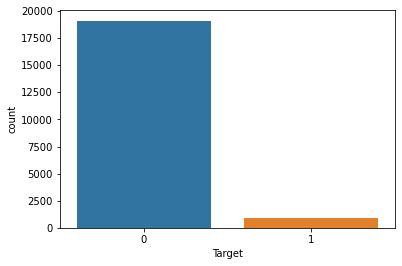

In [21]:
sns.countplot(x = df.Target)
plt.show()

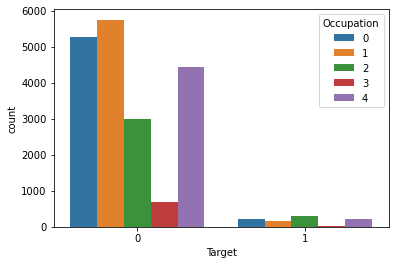

In [22]:
sns.countplot(x = df.Target, hue = df.Occupation)
plt.show()

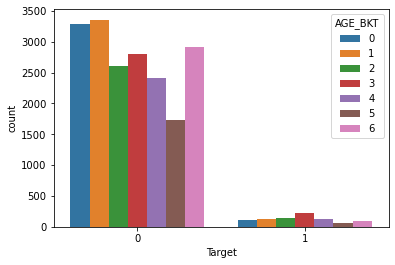

In [23]:
sns.countplot(x = df.Target, hue = df.AGE_BKT)
plt.show()

In [ ]:
df.Target.value_counts()

In [24]:
df.columns

Index(['Target', 'Age', 'Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period',
       'Cust_ID', 'Gender', 'Occupation', 'AGE_BKT'],
      dtype='object')

In [19]:
df1 = df.drop(['Cust_ID', 'Age'], axis = 1)
df1.head(2)

,Target,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender,Occupation,AGE_BKT
0,0,160378.60,2,826,9.0,1,1,0
1,1,84370.59,14,843,9.0,1,0,3


In [20]:
inputData=df1.iloc[:,1:]
outputData=df1.iloc[:,0]

In [21]:
print(inputData.columns)
outputData.name

Index(['Balance', 'No_OF_CR_TXNS', 'SCR', 'Holding_Period', 'Gender',
       'Occupation', 'AGE_BKT'],
      dtype='object')


'Target'

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Target'], axis=1), df['Target'], test_size = 0.35)

In [23]:
from sklearn.model_selection import train_test_split

seed = 10
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(inputData, outputData, test_size = test_size, random_state = seed, stratify = outputData)

In [34]:
!pip install imbalanced-learn


In [29]:
from imblearn.over_sampling import SMOTE

seed = 10
k = 1
sm =  SMOTE( sampling_strategy='auto', k_neighbors=1, random_state=seed)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [30]:
y_res.value_counts()

0    13378
1    13378
Name: Target, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 10, max_iter = 1000)
model.fit(X_res,y_res) # training the model 

LogisticRegression(max_iter=1000, random_state=10)

In [32]:
pred = model.predict(X_test)
pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
model.coef_

array([[-4.53282712e-06,  4.63674023e-02,  9.66536596e-04,
        -7.25835200e-02, -1.04925201e-03, -5.82983347e-04,
        -5.01677000e-03]])

In [34]:
model.intercept_

array([-0.00135936])

In [35]:
model.predict_proba(X_test)

array([[0.18171283, 0.81828717],
       [0.69633497, 0.30366503],
       [0.43462773, 0.56537227],
       ...,
       [0.79564252, 0.20435748],
       [0.60312811, 0.39687189],
       [0.85811103, 0.14188897]])

In [36]:
from sklearn.metrics import confusion_matrix
#con_mat = confusion_matrix(y_test, pred)
con_mat = confusion_matrix(y_test, pred)
print(con_mat)


[[3730 2004]
 [  65  201]]


In [37]:
labels = [1, 0]
con_mat = confusion_matrix(y_test, pred, labels = labels)
print(con_mat)

[[ 201   65]
 [2004 3730]]


In [38]:
accuracy = (con_mat[0,0]+con_mat[1,1])/y_test.size
print(accuracy)    # Mean Accuracy on testing data

0.6551666666666667


In [39]:
# Creating a model by handling imbalanced class
model_1 = LogisticRegression(class_weight='balanced')
model_1.fit(X_train,y_train) # training the model 

LogisticRegression(class_weight='balanced')

In [40]:
pred_1 = model_1.predict(X_test)

In [41]:
labels = [1,0]

con_mat_1 = confusion_matrix(y_test, pred_1, labels=labels)
print(con_mat_1)

[[ 203   63]
 [2095 3639]]


In [ ]:
precision = con_mat[0][0]/(con_mat[0][0] + con_mat[1][0])
print(precision)

In [ ]:
#pred_array = np.asarray(pred).reshape(-1,1)
#pred_array.shape
#y_array = np.asarray(y_test).reshape(-1,1)
#y_array.shape

In [42]:
print(model.score(X_test, y_test)) # testing Accuracy
print(model.score(X_res, y_res)) # training accuracy

0.6551666666666667
0.7224547764987292


In [ ]:
print(model.coef_)

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
#model_1.predict_proba(X_test)

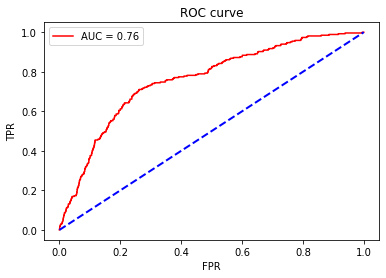

In [44]:
##Computing false and true positive rates

preds = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [45]:
print(roc_auc_score(y_test, preds))
print(auc(fpr, tpr))

0.7588051485532807
0.7588051485532807


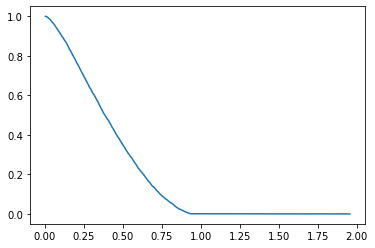

In [46]:
plt.plot(threshold,fpr)

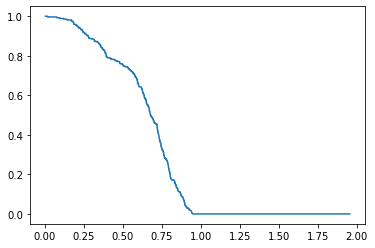

In [47]:
plt.plot(threshold,tpr)

(0.0, 1.0)

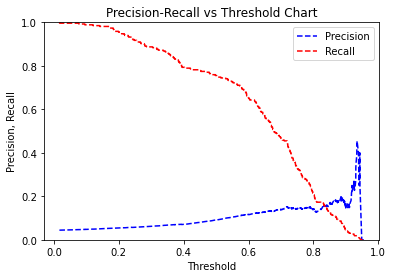

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, preds) 

#pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])


In [49]:
from sklearn.metrics import accuracy_score, classification_report

In [53]:
actual = y_test
predicted = pred
#results = confusion_matrix(actual, predicted) 
#print('Confusion Matrix :')
#print(results) 
#print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted))

Report : 
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      5734
           1       0.09      0.76      0.16       266

    accuracy                           0.66      6000
   macro avg       0.54      0.70      0.47      6000
weighted avg       0.94      0.66      0.76      6000



In [59]:
threshold = 0.82
pred1 = np.where(model.predict_proba(X_test)[:,1] >= threshold, 1, 0)

In [60]:
con_mat_1 = confusion_matrix(y_test, pred1)
print(con_mat_1)

[[5444  290]
 [ 220   46]]


In [ ]:
#from sklearn.preprocessing import binarize
#y_pred_proba = model.predict_proba(X_test)
#y_pred_default = binarize(y_pred_proba, threshold=0.45)
#y_pred_default

In [ ]:
#pred2 = y_pred_default[:,1]

In [58]:
accuracy_score(actual, pred1)

0.129

In [ ]:
pd.Series(model.predict_proba(X_test)[:,1]).hist()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty':['l1', 'l2']
             }
clf = GridSearchCV(LogisticRegression(solver = 'liblinear'),  param_grid)

clf.fit(X_train, y_train)



In [ ]:
clf.best_score_

In [ ]:
clf.best_estimator_